# Linear Regression

## Introduction: the price of wine

There are differences in price and quality of wine from year to year that are sometimes very significant: wines are tasting better when they are older. So,  there is an incentive to store young wines until they are mature.
Wine experts taste the wine and then __predict__ which ones will be the best later.
But it is hard to determine the quality of the wine when it is so young just by tasting it, since the taste will change significantly by the time it will be consumed .

We have seen that on March 4, 1990, the  Princeton Professor of Economics Orley Ashenfelter announced that he can __predict the quality of Bordeaux wine__ without tasting a single drop but just __using a mathematical model.__

Ashenfelter used a method called __linear regression.__

The method predicts an outcome variable – the wine price – using one or more independent variables – such as the wine age or the weather.

The initial reaction was of skepticism.
Robert Parker, the world’s most influential wine expert said : _“Ashenfelter is an absolute total sham. He is like a movie critic who never goes to see the movie but tells you how good it is based on the actors and the director”_ but the method proved its validity very soon.

Let’s see how Ashenfelter was able to predict reliably the wine price.

## One-variable linear regression

The simplest way to predict the wine price – without using any other variable – would be to take the average price of the wine in the previous years:

In [7]:
import pandas as pd
wine = pd.read_csv("wine.csv")
baseline = wine.Price.mean()
print (baseline)

7.0672239999999995


Let’s say the average is 7.07

If I want to predict the price of this year wine bottle, I simply say it will be 7.07 regardless of this year temperature or rain or whatever.

Such simple value is called the Baseline (because if you put it into a chart, it will be a straight line, independently on any other variable):


In [8]:
baseline = wine.Price.mean()

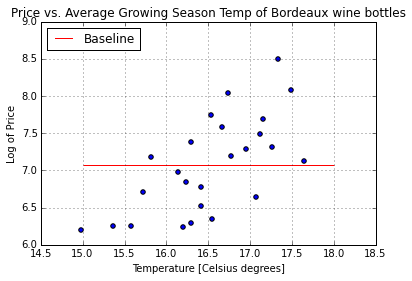

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(wine.AGST, wine.Price)
plt.hlines(baseline, 15, 18, color = 'red', label="Baseline")

plt.legend(loc="upper left")
plt.title("Price vs. Average Growing Season Temp of Bordeaux wine bottles")
plt.xlabel("Temperature [Celsius degrees]")
plt.ylabel("Log of Price")
plt.grid()
plt.show()

As you can see, in this example the baseline never predicts the correct value, only a couple of times goes close but – worst of all – does not follow the trend at all: if the temperature is lower or higher than average, it doesn’t matter.

Let’s see now the more sophisticated model that Ashenfelter used: the Linear Regression Model and see if is better than our baseline.

The linear regression is one (a simple one) of the supervised learning algorithms part of machine learning.

__Supervised learning__ means that examples with the right answers (labeled data) are used __to build (or train) the model__ which then extrapolates and predicts outcomes based on different inputs.
Unsupervised learning would be without any previously labeled data.

In our case we have labeled data: the wine price of the past years. The idea is to “train” our model on these examples such as it will be able to predict future prices.

## The Regression Model

The basic regression model is the single variable regression model, where the independent variable – x – is only one:

$$ y = \beta_{0} + \beta_{1}\cdot x$$

The goal of linear regression is to create a predictive line through the data.  
Beta0 and Beta1 are specially selected coefficients.  
Beta0 = __intercept__ of the line  
Beta1 = __slope__ of the line

Let's see an example, using as independent variable x the average temperature (AGST) which was the one most correlated with the wine price:  
y = wine price  
x = average temperature.

This means the price will increase / decrease linearly based on increase / decrease of temperature.
Let's see how the relation would look like with y = 0.5 * x - 1.25 (beta coefficients arbitrarily picked up, just to follow the trend more or less):

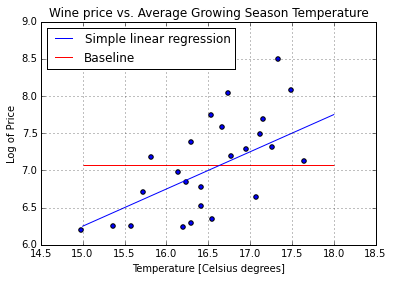

In [11]:
import numpy as np
x = np.linspace(15, 18, 10)  # 100 evenly-spaced values from 0 to 50
y = 0.5 * x - 1.25  # a simple model

plt.scatter(wine.AGST, wine.Price)
plt.hlines(baseline, 15, 18, color = 'red', label="Baseline")
plt.plot(x,y, label="Simple linear regression")
plt.legend(loc="upper left")
plt.title("Wine price vs. Average Growing Season Temperature")
plt.xlabel("Temperature [Celsius degrees]")
plt.ylabel("Log of Price")
plt.grid()
plt.show()

_Looks a better prediction than the baseline!_

## How to find the best model

The simple blue line seems better than the baseline but is it really?  
And are there better models?  
How do you measure the "fitness" of a model?

Every model makes errors.

We can represent the relation between the observations and the predictions as:

$$ y_{i} = \beta_{0} + \beta_{1}\cdot x_{i} + \varepsilon_{i}$$

$$ y_{i}$$ = dependent variable (wine price) for the i-th observation (Target).

$$ x_{i}$$  = independent variable (temperature) for the i-th observation (Features).

$$ \varepsilon_{i}$$ = error term for the i-th observation (__Residual__).

These residuals are the key to measure how good is a model and to compare models against each other.
Let's see an example related to the first data point:

In [12]:
wine.iloc[0]

Year            1952.0000
Price              7.4950
WinterRain       600.0000
AGST              17.1167
HarvestRain      160.0000
Age               31.0000
FrancePop      43183.5690
Name: 0, dtype: float64

_The actual price for 1952 bottles was 7.459 and the temperature in 1952 was bit more than 17 degrees._

In [15]:
price1952 = wine.iloc[0].Price

The simple model y=0.5*x-1.25 would predict for a Temperature = 17.1167 a price of :

In [16]:
predictedPrice = 0.5 * 17.1167 - 1.25; print (predictedPrice)

7.308350000000001


The difference between the actual value (7.4950) and the predicted value (7.3085) is the residual.

In [19]:
price1952 - predictedPrice

0.18664999999999932

The first data point is then represented by this formula including the residual:

$$ y_{1} = -1.25 + 0.5 \cdot x_{1} + 0.18665$$

## Plot the residuals

Let's plot the residuals related to this simple regression line, i.e. the vertical lines separating the actual point from the predicted point.

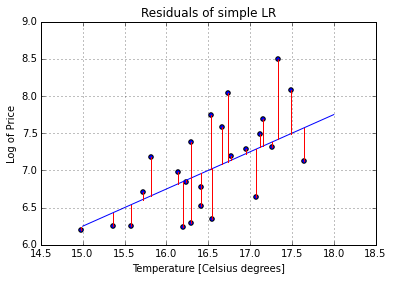

In [21]:
y_bottom = 6
y_top = 9
y_range = y_top - y_bottom

plt.ylim(y_bottom, y_top)
plt.scatter(wine.AGST, wine.Price) # the actual points
plt.plot(x,y, label="Simple linear regression") # the regression line

    # now let's plot the residuals
for i in range(0, len(wine)):
            # first we need the coordinates of the actual point
    x_point = wine.AGST[i]
    y_point = wine.Price[i]
            # then we need the say how long is the vertical line
            # the vertical line must be between 0 and 1
    y1 = (y_point - y_bottom) / y_range  # scale
    y2 = ((0.5 * x_point - 1.25) - y_bottom) / y_range  # scale
            # now we can plot the vertical RED residual line
    plt.axvline(x_point, ymin=y1, ymax=y2, color="red") 

plt.title("Residuals of simple model y=0.5x-1.25")
plt.xlabel("Temperature [Celsius degrees]")
plt.ylabel("Log of Price")
plt.grid()

_The residuals are the vertical red lines_

## Loss metrics

One way - the most common - to find the best model (i.e., the best choice of coefficients) is to look for the line which has __the smallest error terms.__

This means that is the line with the __smallest residuals__ in total (i.e., the shortest vertical lines).

The idea is to measure the "closeness" between the actual price and its prediction (the regression line) based on the fact that is better to be off by one than by ten ...

Are there other way to find the best model?
As a matter of fact, yes. For example, I could be interested to find a model that prefer to underestimate a prediction instead of overestimating, because maybe is the latter is a much more expensive error. In this case I would need to weight the error with vertical lines "over" the regression line __more than__ the error "under" it.

In the case of looking for the smallest error, the "loss" function or metric could be to take the absolute loss:

$$ | y_{i} - \bar{y_{i}} | $$

for each data point (y_i = actual value and y_bar = predicted value)  and then sum them all together. We would then look for the line minimising this value.

Even better - with nicer mathematical properties - is the squared loss:

$$ (y_{i} - \bar{y_{i}})^{2}$$

This specific metric - and its goodness of fit - is named SSE: the __Sum of Squared Errors__ between actual values and predictions, which is very easy to calculate using Python numpy and vector operations:

In [23]:
SSE_baseline = np.sum((wine.Price - baseline)**2); SSE_baseline

10.1506377256

Here wine.Price is a vector (specifically, it is a pandas Series which is based on numpy arrays) which can be subtracted to a scalar (our baseline), squared and produces a new vector, which can be the input of the numpy function sum() and this just outputs the sum of its elements.

As baseline we choose simply the average value of the actual wine prices, as shown above, which has the advantage of being a value independent on any other variable or factor.

As we can see, the SSE metric for this baseline is around 10.15 (the sum of all squared errors).
Let's compare it to the SSE for our simple regression model:

In [24]:
        # Get SSE for our simple linear regression (LR) model
predictedPrices = 0.5 * wine.AGST - 1.25 
SSE_simpleLR = np.sum((wine.Price - predictedPrices)**2)
SSE_simpleLR

6.032510104999999

The formula seems the same but in this case the vector wine.AGST is multiplied to a scalar and then subtracted to a different scalar [10], then wine.Price is subtracted this time to another vector, the wine.AGST and squared and numpy takes care of this operation [11]. Very practical!

The Sum of Squared Errors for our simple LR model is much smaller than the baseline, which tells us that this model __can make smaller errors__ when predicting wine prices, therefore - according to our chosen metric of fitness - this model is better than the baseline.

## Better metrics: RMSE and R-squared

The __MSE is the Mean Squared Error__ and is basically just the average SSE:

In [27]:
n = len(wine.Price) # number of examples
MSE_baseline = SSE_baseline / n; MSE_baseline

0.406025509024

In [28]:
MSE_simpleLR = SSE_simpleLR / n; MSE_simpleLR

0.24130040419999996

which tells us that the average squared error for each data point is around 0.41 for the baseline and a better 0.24 for our LR model.
MSE is a slightly better metric than SSE because does not depend on the number of data points N.

SSE and MSE can be hard to interpret: the former depends on N (the size of the dataset) and the latter unit is hard to understand (a squared value), therefore is normal to use the __Root-Mean-Square Error (RMSE)__ which is just the root of MSE:

In [29]:
RMSE_baseline = MSE_baseline ** 0.5; RMSE_baseline

0.6372013096533936

In [30]:
RMSE_simpleLR = MSE_simpleLR ** 0.5; RMSE_simpleLR

0.49122337505456715

which tells us the average error is around 0.64 for the baseline and a better 0.49 for our LR model.

Another useful metric is the R-squared which compares an SSE from a given model with the one from a baseline:

$$ R^{2} = 1 - \frac{SSE}{SST}$$

(SST being the baseline SSE)

In [33]:
R2 = 1 - SSE_simpleLR / SSE_baseline; R2

0.4057013689114375

R2 is by definition a number between 0 and 1 (assuming the SST is not zero):
0 when the SSE from a model is equal to the SST (means there is no improvement) and 1 when SSE is null, means it is a perfect predictive model.

__Higher R2, better the model.__

R2 is unit-less and universally interpretable but should be used only to compare models inside the same problems. Hard problems may have an R2 close to zero even if the model is good ...

## Closed form

We have seen that the regression line best fitting is the one that minimises the sum of these squared losses. But we still need to find it.
One way is to use its closed form.

An equation is said to be a closed-form solution if it solves a given problem in terms of functions and mathematical operations from a given generally accepted set.

The general linear model - as we have seen - is:

$$ \bar{y} = \sum_{i}^{N} (x_{i} \cdot \beta_{i}) $$

The idea is to minimise the costs over all data points, i.e. we can choose as cost function the least squares and to minimise the SSE:

$$  min (\sum_{i}^{N} ((y_{i} - (\beta_{0} + \beta_{1} \cdot x_{i})^{2})) $$

which is a function of two variables : beta0 and beta1.

This is a convex function which has exactly one and only one minimum, that can be found putting the derivative to zero.

Note: it is possible to solve the closed form also for more than two beta variables by using the gradient.
In mathematics, the gradient is a generalisation of the usual concept of derivative to functions of several variables. Given a differentiable function of several variables, its gradient is the vector whose components are the n partial derivatives.

For linear regression, the gradient (usually expressed with the greek symbol nabla) would be:

$$ \nabla g(\beta) = [\frac{\partial g}{\partial \beta_{i}}] $$

where these are n - dimensional vectors; the vector of all beta coefficients is calculated via partial derivatives ( like a derivate with respect to beta_i, treating all other variables as constant).
End of note.

Taking the derivative from

 $$ SSE(\beta_{0}, \beta_{1}) = \sum_{i}^{N} (y_{i} - (\beta_{0} + \beta_{1} \cdot x_{i})^{2}) $$  to
 $$ \nabla SSE(\beta_{0}, \beta_{1}) = \left\{\begin{matrix}
-2 \cdot \sum_{i}^{N} (y_{i} - (\beta_{0} + \beta_{1} \cdot x_{i})) \\
-2 \cdot \sum_{i}^{N} (y_{i} - (\beta_{0} + \beta_{1} \cdot x_{i})) \cdot x_{i}
\end{matrix}\right. $$

which can be solved analytically:

In [35]:
X = wine.AGST   # the known variable
Y = wine.Price  # the variable to predict

numerator = sum(X*Y) - (1/n)*((sum(X)*sum(Y)))
numerator

6.9529241983991596

In [36]:
denominator = sum(X**2) - (1/n)*((sum(X)*sum(X)))
denominator

10.947860997596763

In [37]:
slope = numerator / denominator
slope  # this is beta1 coefficient

0.63509430745653805

In [38]:
intercept = Y.mean() - slope*(X.mean())
intercept  # this is beta0 coefficient

-3.4177613134872953

Therefore the final linear regression model is :

__winePrice = -3.4178 + 0.6351 * x__

where our x known variable is the average temperature.

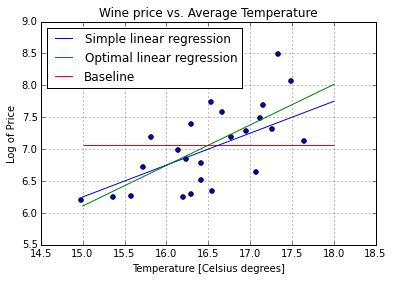

In [40]:
y2 = 0.6351 * x - 3.4178 # solution from closed form
plt.scatter(wine.AGST, wine.Price)
plt.hlines(baseline, 15, 18, color = 'red', label="Baseline")
plt.plot(x,y, label="Simple linear regression")
plt.plot(x,y2, label = "Optimal linear regression")
plt.legend(loc="upper left")
plt.title("Wine price vs. Average Temperature")
plt.xlabel("Temperature [Celsius degrees]")
plt.ylabel("Log of Price")
plt.grid()
plt.show()

_that gives an SSE of 5.73, an RMSE of 0.479 and an R2 of 0.435_

## Interpreting the coefficients

Beta0 is the intercept of the regression line, not very meaningful.

Beta1 is the slope. It is the __predicted change in the output per unit change in input.__
Be careful because the magnitude depends on units of both features and observations, so always indicate the unit.

In our case, it means that every Celsius degree additional in the average temperature causes an increase in the log of price of 0.6351

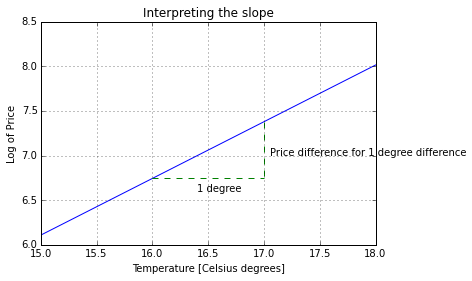

In [44]:
y2 = 0.6351 * x - 3.4178
plt.plot(x,y2) # regression line

    # draw dashed lines
x1_point = 17.0
x2_point = 16.0
y1_point = 0.6351 * x1_point - 3.4178
y2_point = 0.6351 * x2_point - 3.4178

plt.plot((x1_point, x1_point), (y1_point, y2_point), 'g--')
plt.plot((x2_point, x1_point), (y2_point, y2_point), 'g--')

    # add notes next to the dashed lines
plt.annotate("Price difference for 1 degree difference", xy=(17.05,7))
plt.annotate("1 degree ", xy=(16.4, 6.6))

plt.title("Interpreting the slope")
plt.xlabel("Temperature [Celsius degrees]")
plt.ylabel("Log of Price")
plt.grid()
plt.show()

How can I use the formula to predict a price?

Let’s say this year the average temperature was 18 degrees, then here is the prediction:

In [46]:
-3.4178 + 0.6351 * 18

8.014

## Next steps

The closed-form solution has one downsize: it has quadratic costs and can become prohibitively expensive for big amount of variables or data points.
Our aim is to minimise this cost with an optimisation approach.
A method called Gradient Descent can be used to reach the solution with acceptable costs and will be described in a next post.

We have seen that Price and average Temperature are correlated, i.e. there is a relationship between them. We also have seen how strong this relationship is.

We have now seen how this relationship can be modelled using a linear regression (approximating the relationship to a linear one) and therefore predict future wine prices. The model gives us also an interpretation of the relation between price and temperature, i.e. temperature increase = higher price.

Now, how accurately can we predict future wine prices? And can we use multiple variables to improve the accuracy? More on this in later posts.

As you can see, the model assumes that the dependence of Y on X is linear.
This is a simplistic approach because true regression functions are rarely linear but you can model a relation using non-linear functions (one of next posts).

Although it may seem overly simplistic, linear regression is extremely useful both conceptually and practically.

// This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"> Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License. </a>